In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, confusion_matrix  
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Load and Merge datasets

In [2]:
white_wine = pd.read_csv('winequality-white.csv', sep=';')
red_wine = pd.read_csv('winequality-red.csv', sep=';')

In [3]:

red_wine['wine_type'] = 'red'   # add a column for the type
white_wine['wine_type'] = 'white'

In [4]:
wines = pd.concat([red_wine, white_wine])
wines['quality_label'] = wines['quality'].apply(lambda value: 'low' if value <= 5 else 'medium' if value <= 7 else 'high')

In [5]:
wines = wines.sample(frac=1, random_state=42).reset_index(drop=True)

In [6]:
#Red wine + White wine
wines.shape

(6497, 14)

In [7]:
wines.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
wine_type                object
quality_label            object
dtype: object

In [8]:
wines.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,white,high
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,red,low
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,white,medium
3,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6,white,medium
4,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,white,medium


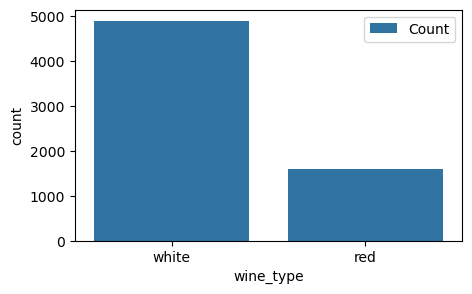

In [9]:
plt.figure(figsize=(5, 3))  # Set the width and height in inches
sns.countplot(x=wines['wine_type'],label="Count")
plt.show()

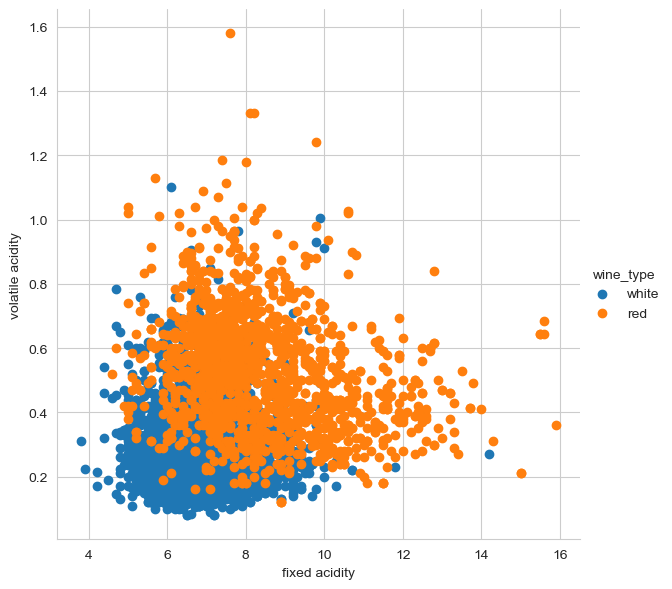

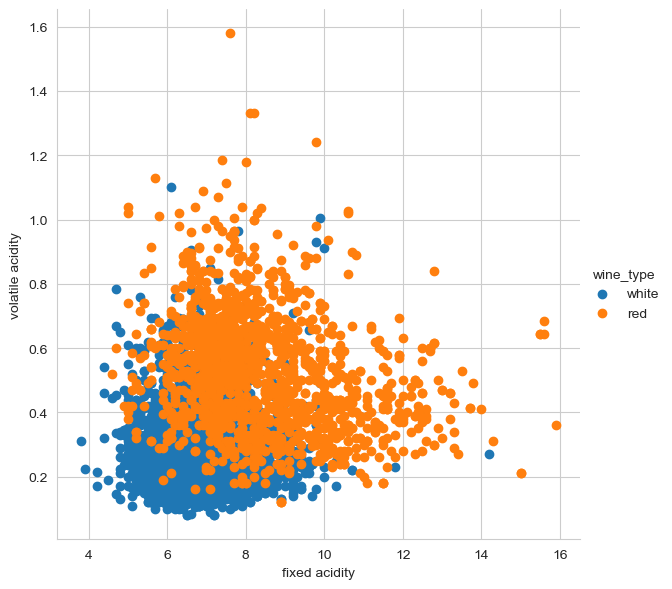

In [48]:
sns.set_style("whitegrid") 
  
sns.FacetGrid(wines, hue ="wine_type",  
              height = 6).map(plt.scatter,  
                              'fixed acidity',  
                              'volatile acidity').add_legend() 
plt.show()

#### X and y

In [11]:
#X = wines.drop(['quality','wine_type', 'quality_label'], axis=1)
X = wines.drop(['wine_type','quality_label'], axis=1)

y = wines['wine_type']

In [12]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7
3,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6
4,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6


## Split data

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42)

In [28]:
print(Counter(y_train), Counter(y_test))
#print('Features:', list(X))

Counter({'white': 3418, 'red': 1129}) Counter({'white': 1480, 'red': 470})


In [29]:
print('Train shape - ', X_train.shape)

print('Test shape - ', X_test.shape)

Train shape -  (4547, 12)
Test shape -  (1950, 12)


# Feature Scaling




In [30]:
#scaler = StandardScaler()
scaler = MinMaxScaler()

scaler.fit(X_train)

# Scale the training data
X_train = scaler.transform(X_train)

# Scale the test data using the same scaler
X_test = scaler.transform(X_test)

In [31]:
#X_train[:5]

# Train a Model using Logistic Regression

In [32]:
lr = LogisticRegression()

lr.fit(X_train, y_train)

LogisticRegression()

## Predict and Evaluate Model Performance

In [33]:
y_pred = lr.predict(X_test)

In [34]:
results = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix of test data:")
print(results)

Confusion Matrix of test data:
[[ 448   22]
 [   9 1471]]


In [35]:
rep = classification_report(y_test, y_pred) 
print ("Report of test data:")
print(rep)

Report of test data:
              precision    recall  f1-score   support

         red       0.98      0.95      0.97       470
       white       0.99      0.99      0.99      1480

    accuracy                           0.98      1950
   macro avg       0.98      0.97      0.98      1950
weighted avg       0.98      0.98      0.98      1950



In [36]:
print('Accuracy of Logistic regression classifier on test set: {:.2f}'.format(lr.score(X_test, y_test)))

Accuracy of Logistic regression classifier on test set: 0.98


In [37]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [38]:
smote = SMOTE()

X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)

In [39]:
print("Before SMOTE :" , Counter(y_train))
print("After SMOTE :" , Counter(y_train_smote))

Before SMOTE : Counter({'white': 3418, 'red': 1129})
After SMOTE : Counter({'white': 3418, 'red': 3418})


In [40]:
# shape increased major class * 3
print('Shape of train data',X_train_smote.shape)

Shape of train data (6836, 12)


In [44]:
lg = LogisticRegression()
lg.fit(X_train_smote,y_train_smote)

LogisticRegression()

In [45]:
y_pred_smote = lg.predict(X_test)

In [46]:
results = confusion_matrix(y_test,y_pred_smote)
print ("Confusion Matrix of test data after SMOTE:")
print(results)

Confusion Matrix of test data after SMOTE:
[[ 461    9]
 [  18 1462]]


In [47]:
rep = classification_report(y_test, y_pred_smote)
print ("Report of test data after SMOTE:")
print(rep)

Report of test data after SMOTE:
              precision    recall  f1-score   support

         red       0.96      0.98      0.97       470
       white       0.99      0.99      0.99      1480

    accuracy                           0.99      1950
   macro avg       0.98      0.98      0.98      1950
weighted avg       0.99      0.99      0.99      1950

